In [55]:
import itertools
import glob
import os

import matplotlib.pylab as plt
import numpy as np

import SimDataDB

In [71]:
DIR = "../runs_cifar10_c/"
paths = glob.glob(f"{DIR}/*")

# Plot N_step convergence test

In [115]:
def plot_convergence_test(path):
    sdb = SimDataDB.SimDataDB2(f"{path}/convergence.sqlite", "infer_test_error")
    schemes = sdb.Query('select distinct scheme from infer_test_error')
    schemes = [s[0] for s in schemes]
    print(path)
    for s in schemes:
        y = sdb.Query(f'select n_step, _0 from infer_test_error where scheme="{s}"')
        t, e = zip(*y)
        plt.plot(t, 1-np.array(e), label=s)
    plt.ylim((0,1))
    #plt.yscale('log')
    #plt.ylim((0.05,1))
    #plt.ylim(0.05, 0.15)
    plt.legend()

../runs_cifar10_c/ContinuousImageClassifier_alpha=1,hidden=16,n_classes=10,n_step=1,scheme=RK4,n_basis=1,basis=piecewise_constant,norm=BatchNorm-opt-flax,kernel_init=kaiming_out,training=True_20210512-201217
../runs_cifar10_c/ContinuousImageClassifier_alpha=1,hidden=16,n_classes=10,n_step=1,scheme=Euler,n_basis=1,basis=piecewise_constant,norm=BatchNorm-opt-flax,kernel_init=kaiming_out,training=True_20210512-190217


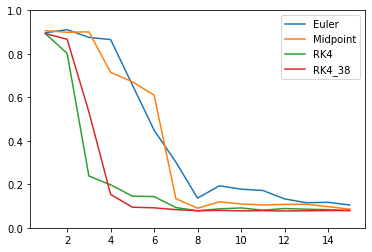

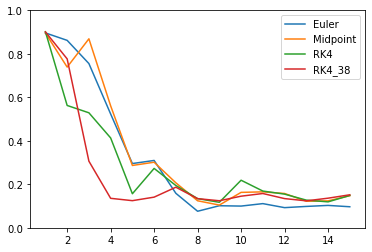

In [116]:
for p in paths:
    plt.figure()
    try:
        plot_convergence_test(p)
    except:
        pass

# Plot Projection Tests

In [74]:
path = '../runs_cifar10_b/ContinuousImageClassifier_alpha=16,hidden=16,n_classes=10,n_step=1,scheme=RK4,n_basis=1,basis=piecewise_constant,norm=BatchNorm,kernel_init=kaiming_out,training=True_20210502-005042'

In [113]:
def plot_project_path(path, table='infer_projected_test_error3'):
    sdb = SimDataDB.SimDataDB2(f"{path}/convergence.sqlite", "infer_projected_test_error")
    bases = sdb.Query(f'select distinct basis from {table}')
    bases = [s[0] for s in bases]
    print(path)

    for b in bases:
        schemes = sdb.Query(f'select distinct scheme from {table} where basis="{b}"')
        schemes = [s[0] for s in schemes]
        for s in schemes:
            y = sdb.Query(f'select n_basis, _0, _1 from {table} where basis="{b}" and scheme="{s}"')
            print(schemes, b)
            n_basis, acc, n_params = map(np.array, zip(*y))
            labels = [f"{n/1e3:2.1f}k\n{b}" for b, n in zip(n_basis, n_params)]
            plt.xticks(n_params, labels=labels)
            plt.plot(n_params, 1-acc, '-+',label=f'{b}{s}')
    #plt.yscale('log')
    #plt.ylim(0.05, 0.15)
    plt.ylim((0.0,1))
    
    plt.xlabel('# Paramets / N_basis')
    plt.ylabel('Test set Errors')
    plt.legend()

../runs_cifar10_c/ContinuousImageClassifier_alpha=1,hidden=16,n_classes=10,n_step=1,scheme=RK4,n_basis=1,basis=piecewise_constant,norm=BatchNorm-opt-flax,kernel_init=kaiming_out,training=True_20210512-201217
['Euler', 'RK4'] fem_linear
['Euler', 'RK4'] fem_linear
['Euler', 'RK4'] piecewise_constant
['Euler', 'RK4'] piecewise_constant
../runs_cifar10_c/ContinuousImageClassifier_alpha=1,hidden=16,n_classes=10,n_step=1,scheme=Euler,n_basis=1,basis=piecewise_constant,norm=BatchNorm-opt-flax,kernel_init=kaiming_out,training=True_20210512-190217
['Euler', 'RK4'] fem_linear
['Euler', 'RK4'] fem_linear
['Euler', 'RK4'] piecewise_constant
['Euler', 'RK4'] piecewise_constant


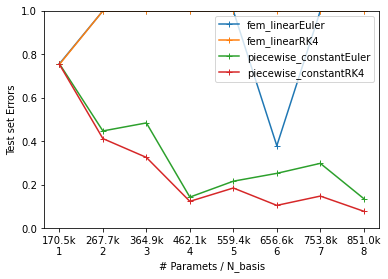

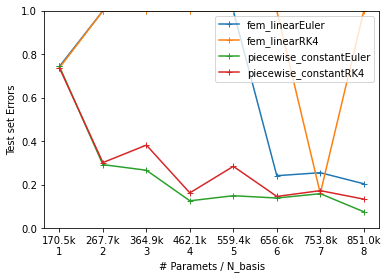

In [114]:
for p in paths:
    plt.figure()
    try:
        plot_project_path(p)
    except Exception as e:
        print(e)

# Plot interpolation 

../runs_cifar10_c/ContinuousImageClassifier_alpha=1,hidden=16,n_classes=10,n_step=1,scheme=RK4,n_basis=1,basis=piecewise_constant,norm=BatchNorm-opt-flax,kernel_init=kaiming_out,training=True_20210512-201217
['Euler', 'RK4'] fem_linear
['Euler', 'RK4'] fem_linear
['Euler', 'RK4'] piecewise_constant
['Euler', 'RK4'] piecewise_constant
../runs_cifar10_c/ContinuousImageClassifier_alpha=1,hidden=16,n_classes=10,n_step=1,scheme=Euler,n_basis=1,basis=piecewise_constant,norm=BatchNorm-opt-flax,kernel_init=kaiming_out,training=True_20210512-190217
['Euler', 'RK4'] fem_linear
['Euler', 'RK4'] fem_linear
['Euler', 'RK4'] piecewise_constant
['Euler', 'RK4'] piecewise_constant


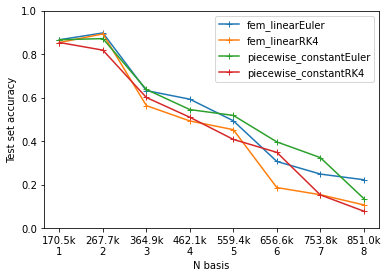

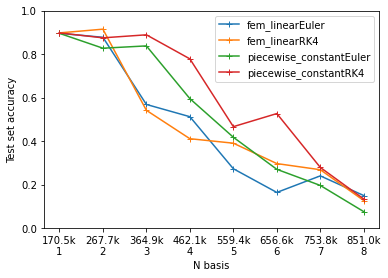

In [109]:
for p in paths:
    plt.figure()
    try:
        plot_project_path(p, 'infer_interpolated_test_error2')
    except Exception as e:
        print(e)